# 🚜Predicting the Sale Price of Bulldozers using Machine Learning

## 🔧Preparing the tools

In [3]:
# Regular EDA (Exploratory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 📇Load Data

In [4]:
# Import training and validation sets
df = pd.read_csv("data/TrainAndValid.csv",
                 low_memory=False)             # To deal with DtypeWarning

df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 🔎Data Exploration (Exploratory Data Analysis - EDA)

In [5]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
# Is there any null values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<AxesSubplot:xlabel='saledate', ylabel='SalePrice'>

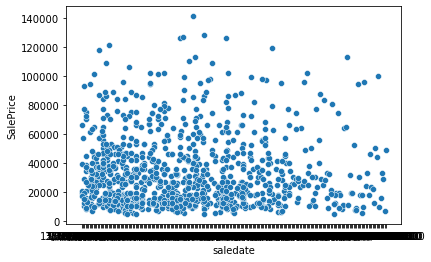

In [7]:
# Scatter plot on "saledate" with "SalePrice" column for first 1000 rows
sns.scatterplot(x=df["saledate"][:1000], y=df["SalePrice"][:1000])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

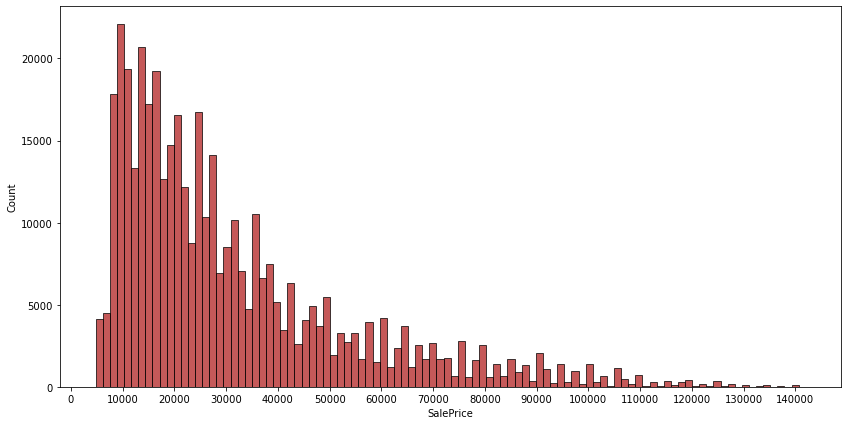

In [8]:
# Histogram on "Sale Price"
plt.figure(figsize=(14, 7))
plt.xticks(np.arange(0, 200000, step=10000))
sns.histplot(df["SalePrice"], color="firebrick", bins=100)

### Parsing Data

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `'parse_dates'` parameter.

In [9]:
# Current "saledate" column
df["saledate"].head(10)

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
5    12/18/2008 0:00
6     8/26/2004 0:00
7    11/17/2005 0:00
8     8/27/2009 0:00
9      8/9/2007 0:00
Name: saledate, dtype: object

In [10]:
df["saledate"].dtype

dtype('O')

In [11]:
# Now parsing the "saledate" column by creating new dataframe
df = pd.read_csv("data/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

In [12]:
# "saledate" column after parsing
df["saledate"].head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

In [13]:
df["saledate"].dtype

dtype('<M8[ns]')

<AxesSubplot:xlabel='saledate', ylabel='SalePrice'>

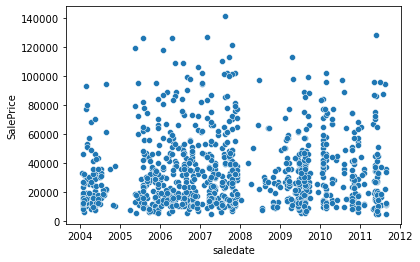

In [14]:
# Scatter plot on "saledate" with "SalePrice" column for first 1000 rows
sns.scatterplot(x=df["saledate"][:1000], y=df["SalePrice"][:1000])

In [15]:
# Head of DataFrame
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.saledate.head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by `'saledate'`

When working with time series data, it's a good idea to sort it by data.

In [17]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [18]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Values of different columns

In [19]:
# States with their sales
df.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

<AxesSubplot:ylabel='Number of Sales'>

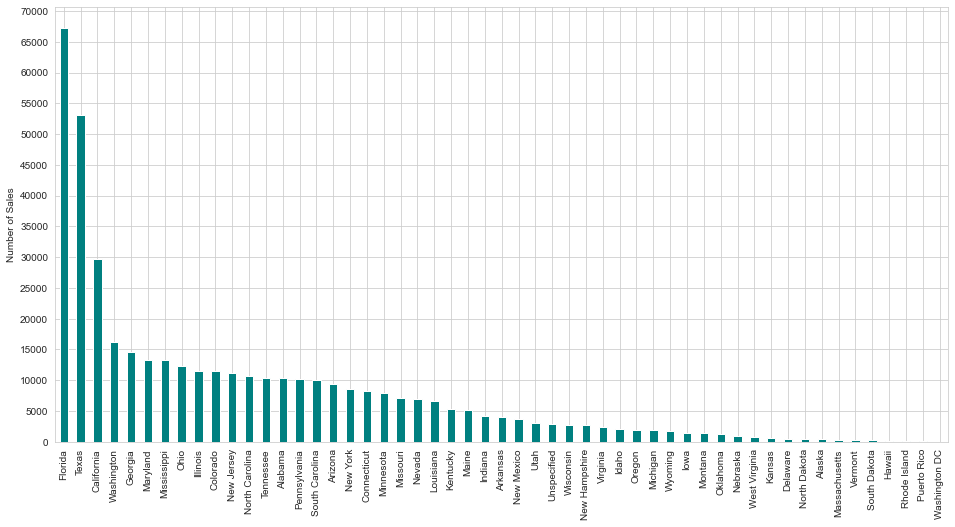

In [20]:
# Visualize states with their sales
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
plt.yticks(np.arange(0, 80000, step=5000))
plt.ylabel("Number of Sales")
df.state.value_counts().plot(kind="bar", color="teal")

### Make a copy of the original DataFrame

Since we're going to be manipulating the data, we'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [21]:
# Make a copy
df_tmp = df.copy()
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


## 🎨Feature Engineering

### Add datetime parameters for `saledate` column

In [22]:
# Add datetime parameters for saledate column
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

# Drop original saledate
df_tmp.drop("saledate", axis=1, inplace=True)

In [23]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleDay,saleMonth,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,17,1,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,31,1,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,31,1,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,31,1,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,31,1,1,31


### Spliting data into training and validation sets

In [24]:
# We will be using saleYear to split the data
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [25]:
# Split data into training and validation sets
df_valid = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_train), len(df_valid)

(401125, 11573)

### Make copies of the original training and validation sets

Since we're going to be manipulating the data, we'll make copies of the original training and validation sets and perform our changes there.

This will keep the original training and validation sets in tact if we need it again.

In [26]:
# Make a copy of training and validation set
df_train_tmp = df_train.copy()
df_valid_tmp = df_valid.copy()

### Convert non-numeric data into numeric data

One way we can turn all of our data into numbers is by converting them (strings) into pandas catgories.

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [27]:
# Find the columns which contain string
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


##### For training set

In [28]:
# This will convert all the strings into categories
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_train_tmp[label] = content.astype("category").cat.as_ordered()

In [29]:
df_train_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 393123
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   401125 non-null  int64   
 1   SalePrice                 401125 non-null  float64 
 2   MachineID                 401125 non-null  int64   
 3   ModelID                   401125 non-null  int64   
 4   datasource                401125 non-null  int64   
 5   auctioneerID              380989 non-null  float64 
 6   YearMade                  401125 non-null  int64   
 7   MachineHoursCurrentMeter  142765 non-null  float64 
 8   UsageBand                 69639 non-null   category
 9   fiModelDesc               401125 non-null  category
 10  fiBaseModel               401125 non-null  category
 11  fiSecondaryDesc           263934 non-null  category
 12  fiModelSeries             56908 non-null   category
 13  fiModelDescriptor       

##### For validation set

In [30]:
# This will convert all the strings into categories
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_valid_tmp[label] = content.astype("category").cat.as_ordered()

In [31]:
df_valid_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11573 entries, 405675 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   11573 non-null  int64   
 1   SalePrice                 11573 non-null  float64 
 2   MachineID                 11573 non-null  int64   
 3   ModelID                   11573 non-null  int64   
 4   datasource                11573 non-null  int64   
 5   auctioneerID              11573 non-null  float64 
 6   YearMade                  11573 non-null  int64   
 7   MachineHoursCurrentMeter  4739 non-null   float64 
 8   UsageBand                 4031 non-null   category
 9   fiModelDesc               11573 non-null  category
 10  fiBaseModel               11573 non-null  category
 11  fiSecondaryDesc           8037 non-null   category
 12  fiModelSeries             1759 non-null   category
 13  fiModelDescriptor         2897 non-null 

##### `Thanks to pandas Categories we now have a way to access all of our data in the form of numbers.`

In [32]:
# Numerical codes for each category in 'state' column
df_train_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
393098    31
400217    31
400302    31
400393    31
393123    31
Length: 401125, dtype: int8

In [33]:
# Numerical codes for each category in 'state' column
df_valid_tmp.state.cat.codes

405675    21
401133     8
406076    14
409018    23
409026    23
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 11573, dtype: int8

### Filling missing values (For training set)

##### Check missing values

In [34]:
# Ratio of missing values with total number of values
df_train_tmp.isna().sum() / len(df_train_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.050199
YearMade                    0.000000
MachineHoursCurrentMeter    0.644089
UsageBand                   0.826391
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.342016
fiModelSeries               0.858129
fiModelDescriptor           0.820707
ProductSize                 0.525460
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.739829
Enclosure                   0.000810
Forks                       0.521154
Pad_Type                    0.802720
Ride_Control                0.629527
Stick                       0.802720
Transmission                0.543210
Turbocharged                0.802720
B

In [35]:
# Total missing data
df_train_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension             375906
Blade_Width         

##### Filling numeric missing values

In [36]:
# All columns with numeric values
for label, content in df_train_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleDay
saleMonth
saleDayOfWeek
saleDayOfYear


In [37]:
# Check for which numeric columns have null values
for label, content in df_train_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [38]:
# Ratio of null value with total values for 'auctioneerID' column
df_train_tmp.auctioneerID.isna().sum() / len(df_train_tmp)

0.050198815830476785

In [39]:
# Ratio of null value with total values for 'MachineHoursCurrentMeter' column
df_train_tmp.MachineHoursCurrentMeter.isna().sum() / len(df_train_tmp)

0.6440885010906825

In [40]:
# Fill missing values
for label, content in df_train_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_train_tmp[label+"_is_missing"] = pd.isnull(content)
            
            # Fill missing numeric values with median
            df_train_tmp[label] = content.fillna(content.median())

In [41]:
# Total missing data
df_train_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              331486
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        137191
fiModelSeries                          344217
fiModelDescriptor                      329206
ProductSize                            210775
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           296764
Enclosure                                 325
Forks                             

##### Filling missing categorical values

In [42]:
# Check for columns which aren't numeric
for label, content in df_train_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [43]:
# Turn categorical variables into numbers and fill missing
for label, content in df_train_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate whether sample had missing value
        df_train_tmp[label + "_is_missing"] = pd.isnull(content)
        
        # Turn categories into numbers and add + 1
        df_train_tmp[label] = pd.Categorical(content).codes + 1
        # Reason behind +1 is that pandas assing -1 to all null values when converting it into categories

In [44]:
df_train_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 393123
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 78.8 MB


In [45]:
# Check is there any other missing values
df_train_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

### Filling missing values (For validation set)

##### Check missing values

In [46]:
# Ratio of missing values with total number of values
df_valid_tmp.isna().sum() / len(df_valid_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.000000
YearMade                    0.000000
MachineHoursCurrentMeter    0.590512
UsageBand                   0.651689
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.305539
fiModelSeries               0.848008
fiModelDescriptor           0.749676
ProductSize                 0.503759
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.764452
Enclosure                   0.000778
Forks                       0.512832
Pad_Type                    0.830467
Ride_Control                0.643826
Stick                       0.830467
Transmission                0.587229
Turbocharged                0.830467
B

In [47]:
# Total missing data
df_valid_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter     6834
UsageBand                    7542
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3536
fiModelSeries                9814
fiModelDescriptor            8676
ProductSize                  5830
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 8847
Enclosure                       9
Forks                        5935
Pad_Type                     9611
Ride_Control                 7451
Stick                        9611
Transmission                 6796
Turbocharged                 9611
Blade_Extension             10809
Blade_Width                 10809
Enclosure_Type

##### Filling numeric missing values

In [48]:
# All columns with numeric values
for label, content in df_valid_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleDay
saleMonth
saleDayOfWeek
saleDayOfYear


In [49]:
# Check for which numeric columns have null values
for label, content in df_valid_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MachineHoursCurrentMeter


In [50]:
# Ratio of null value with total values for 'MachineHoursCurrentMeter' column
df_valid_tmp.MachineHoursCurrentMeter.isna().sum() / len(df_valid_tmp)

0.5905123995506784

In [51]:
# Fill missing values
for label, content in df_valid_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_valid_tmp[label+"_is_missing"] = pd.isnull(content)
            
            # Fill missing numeric values with median
            df_valid_tmp[label] = content.fillna(content.median())

In [52]:
# Adding 'auctioneerID_is_missing' column in the validation dataset and putting 'False' boolean value
df_valid_tmp["auctioneerID_is_missing"] = False

In [53]:
# Total missing data
df_valid_tmp.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                               7542
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                         3536
fiModelSeries                           9814
fiModelDescriptor                       8676
ProductSize                             5830
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                            8847
Enclosure                                  9
Forks                                   5935
Pad_Type  

##### Filling missing categorical values

In [54]:
# Check for columns which aren't numeric
for label, content in df_valid_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [55]:
# Turn categorical variables into numbers and fill missing
for label, content in df_valid_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate whether sample had missing value
        df_valid_tmp[label + "_is_missing"] = pd.isnull(content)
        
        # Turn categories into numbers and add + 1
        df_valid_tmp[label] = pd.Categorical(content).codes + 1
        # Reason behind +1 is that pandas assing -1 to all null values when converting it into categories

In [56]:
df_valid_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11573 entries, 405675 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 2.3 MB


In [57]:
# Check is there any other missing values
df_valid_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## 📐Modelling

In [58]:
# Transfer temporary datasets into its original datasets
df_valid = df_valid_tmp
df_train = df_train_tmp

In [59]:
df_train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [60]:
df_valid.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
405675,4449186,46173.2,2318824,26964,173,99.0,1996,0.0,0,2269,...,True,True,True,True,True,False,False,False,True,True
401133,1222855,66000.0,531393,23926,121,3.0,1000,8145.0,2,85,...,True,True,True,True,True,True,True,True,True,True
406076,6258613,26800.0,1810917,13260,149,99.0,2000,24.0,2,1115,...,True,True,True,True,True,True,True,True,True,True
409018,6282680,42100.0,1543404,1830,149,99.0,2004,4373.0,3,64,...,False,False,False,False,False,True,True,True,True,True
409026,6282759,62100.0,1863077,11390,149,99.0,2006,3467.0,3,139,...,False,False,False,False,False,True,True,True,True,True


In [61]:
# Split data into X (features) and y (label)
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_valid.drop("SalePrice", axis=1), df_valid["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building a custom evaluation function

In [62]:
# Create an evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculate root mean squared log error (RMSLE) between predictions and the true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    """
    Return scores for training and validation sets.
    Note: If the valid score is higher than the training score in MAE and RMSLE, then our model is not Overfitted. 
    """
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, valid_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, valid_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, valid_preds)}
    return scores

### Testing our model on a subset (to tune the hyperparameters)

Retraing an entire model would take far too long to continuing experimenting as fast as we want to.

So what we'll do is take a sample of the training set and tune the hyperparameters on that before training a larger model.

In [63]:
# %%time

# # This takes far too long... for experimenting
from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(n_jobs=-1,
#                                random_state=42)
# model.fit(X_train, y_train)

`Upper tab wiil take,
 Wall time: 9min 49s (approx)`

In [64]:
len(X_train)

401125

Depending on our computer, making calculations on ~400,000 rows may take a while...

Let's alter the number of samples each `n_estimator` in the [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) see's using the `max_samples` parameter.

Setting `max_samples` to 10000 means every `n_estimator` (default 100) in our `RandomForestRegressor` will only see 10000 random samples from our DataFrame instead of the entire 400,000.

In other words, we'll be looking at 40x less samples which means we'll get faster computation speeds but we should expect our results to worsen (simple the model has less samples to learn patterns from).

In [65]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [66]:
%%time
# Cutting down on the max number of samples each estimator can see improves time
model.fit(X_train, y_train)

Wall time: 25.9 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [67]:
# Score
show_scores(model)

{'Training MAE': 5562.079819856652,
 'Valid MAE': 7213.530588438607,
 'Training RMSLE': 0.2577376357095064,
 'Valid RMSLE': 0.2951483245480561,
 'Training R^2': 0.8605891310325422,
 'Valid R^2': 0.8314704344390091}

### Hyperparameter Tuning with RandomizedSearchCV

In [68]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=-1,
                                                              random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished


Wall time: 1min 17s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [69]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [70]:
# Evaluate the RandomizedSearchCV model
show_scores(rs_model)

{'Training MAE': 7324.190139861499,
 'Valid MAE': 8590.634385042391,
 'Training RMSLE': 0.3231469183086058,
 'Valid RMSLE': 0.34358851579885985,
 'Training R^2': 0.7710505287172975,
 'Valid R^2': 0.7666052595146043}

### Train a model with the best hyperparamters

**Note:** These were found after 100 iterations (`n_iter=100`) of RandomizedSearchCV.

In [71]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 1min 57s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [72]:
# Scores for ideal model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2953.058699531968,
 'Valid MAE': 5988.062613465692,
 'Training RMSLE': 0.14454124593788553,
 'Valid RMSLE': 0.24705086800403323,
 'Training R^2': 0.958911451383609,
 'Valid R^2': 0.8804118021362989}

In [73]:
# Scores on rs_model (only trained on ~10,000 examples)
show_scores(rs_model)

{'Training MAE': 7324.190139861499,
 'Valid MAE': 8590.634385042391,
 'Training RMSLE': 0.3231469183086058,
 'Valid RMSLE': 0.34358851579885985,
 'Training R^2': 0.7710505287172975,
 'Valid R^2': 0.7666052595146043}

### Make predictions on test data

In [74]:
# Import the test data
df_test = pd.read_csv("data/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [75]:
# Check for any null value
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [76]:
# Numbers of column in testing data
len(df_test.columns)

52

In [77]:
# Numbers of column in training data
len(X_train.columns)

102

### Preprocessing the data (Getting the test dataset in the same format as our training dataset)

In [78]:
def preprocess_data(df):
    """
    Performs transformations on dataframe and returns transformed dataframe.
    """
    # Add datetime parameters for saledate column
    df["saleYear"] = df.saledate.dt.year
    df["saleDay"] = df.saledate.dt.day
    df["saleMonth"] = df.saledate.dt.month
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    # Drop original saledate column
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill missing values
    for label, content in df.items():
        # Fill the numeric rows with median
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)

                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Fill categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            # Add a binary column to indicate whether sample had missing value
            df[label + "_is_missing"] = pd.isnull(content)
            
            # We add +1 to category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes + 1

    return df

In [79]:
# Preprocess test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [80]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


##### There is a difference in number of columns in the test dataset and the X_train dataset.

In [81]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [82]:
# Manually adjust df_test to have 'auctioneerID_is_missing' column
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally now our test dataframe has the same features as our training dataframe, we can make predictions!

In [83]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)
test_preds

array([23013.02983782, 20051.97808793, 47052.36560969, ...,
       15716.82291653, 16652.75460124, 25299.6931017 ])

In [84]:
# Create a dataframe which contains all the predictions
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,23013.029838
1,1227844,20051.978088
2,1227847,47052.365610
3,1227848,68688.510380
4,1227863,44392.923756
...,...,...
12452,6643171,43611.665617
12453,6643173,13144.135442
12454,6643184,15716.822917
12455,6643186,16652.754601


In [85]:
# Export prediction data
df_preds.to_csv("data/test_predictions.csv", index=False)

## 🗿Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable** (SalePrice).

In [86]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.36887460e-02, 1.81172938e-02, 4.40939198e-02, 2.12205494e-03,
       3.38056143e-03, 2.06737277e-01, 3.15091479e-03, 1.01097413e-03,
       5.19704456e-02, 4.23972868e-02, 6.17488292e-02, 4.33257602e-03,
       1.45622036e-02, 1.41355706e-01, 4.39081701e-02, 5.99212309e-03,
       2.81930752e-03, 3.27207885e-03, 3.67069793e-03, 6.57290178e-02,
       5.08588632e-04, 4.83037700e-05, 5.84382305e-04, 1.53728888e-04,
       1.36072196e-03, 7.88068907e-04, 4.11216505e-03, 4.57029215e-03,
       2.16369267e-03, 8.36827519e-05, 1.93156999e-03, 2.01460013e-03,
       2.84299730e-03, 5.80873335e-04, 4.37919147e-04, 9.07142745e-03,
       7.70357467e-04, 1.61555896e-02, 1.78352762e-03, 3.66015687e-03,
       1.00762800e-03, 1.04018155e-03, 2.39151889e-03, 5.44835445e-04,
       4.99843137e-04, 4.70576104e-04, 1.73685039e-04, 3.52053970e-03,
       8.98883024e-04, 4.05711154e-04, 2.04168884e-04, 7.33319848e-02,
       5.66826931e-03, 3.72888229e-03, 2.90307467e-03, 9.94360297e-03,
      

In [93]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    plt.figure(figsize=(14, 8))
    sns.barplot(x="feature_importances", y="features", data=df[:n], orient="h", palette="magma")
    plt.title("Feature importance of top 20 features")
    plt.ylabel("Features")
    plt.xlabel("Feature Importances")

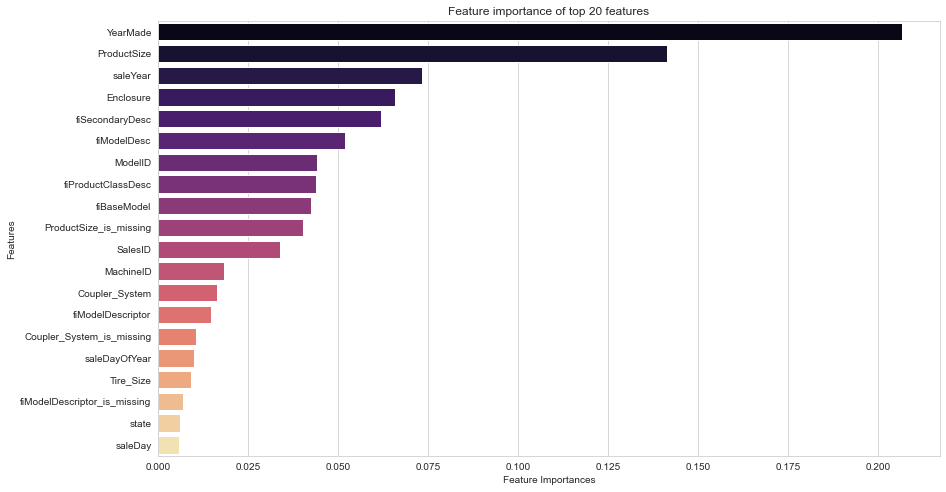

In [94]:
plot_features(X_train.columns, ideal_model.feature_importances_)

## 💾Exporting Model

Exporting the best model with the help of `"joblib"`

In [95]:
from joblib import dump, load

# Save model to file
dump(value=ideal_model,
     filename="model/ideal_model.joblib")

['model/ideal_model.joblib']

In [96]:
# Load the model
loaded_model = load(filename="model/ideal_model.joblib")

show_scores(loaded_model)

{'Training MAE': 2953.058699531968,
 'Valid MAE': 5988.062613465692,
 'Training RMSLE': 0.1445412459378855,
 'Valid RMSLE': 0.24705086800403325,
 'Training R^2': 0.958911451383609,
 'Valid R^2': 0.8804118021362989}